<a href="https://colab.research.google.com/github/pvzinn/bd-2022-1-bia/blob/main/Prova1_VC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Elabore uma função para estimar sinais i1D e sua confiança respectiva (R²)

In [61]:

def estima1d(input1d):
    # média dos dados fornecidos
    mean = np.mean(input1d)

    # soma dos quadrados dos desvios em relação à média
    sum = np.sum((input1d - mean) ** 2)

    # estima o sinal a partir da média
    signal = np.full_like(input1d, mean)

    # soma dos quadrados dos desvios em relação à estimativa do sinal
    sec_sum = np.sum((input1d - signal) ** 2)

    # faz o cálculo do índice que representa a confiança
    ind_conf = 1 - (sec_sum / sum)

    return signal, ind_conf, sum, sec_sum, r_squared


In [66]:
input1d = np.array([range(1341)])
signal, ind_conf, sum, sec_sum, r_squared = estima1d(input1d)
print("Sinal Estimado:", signal)
print("Confiança da Estimativa (R²):", ind_conf)


Sinal Estimado: [[670 670 670 ... 670 670 670]]
Confiança da Estimativa (R²): 0.0


# 3 - A partir do passo anterior, derive uma métrica para para definir a robustez da sua estimativa

In [64]:
robmetric = r_squared * np.sqrt(np.abs(sum - sec_sum))
print(robmetric)

0.0


# 2 - Crie uma analise em escala piramidal gaussiana para criar um detector robusto 

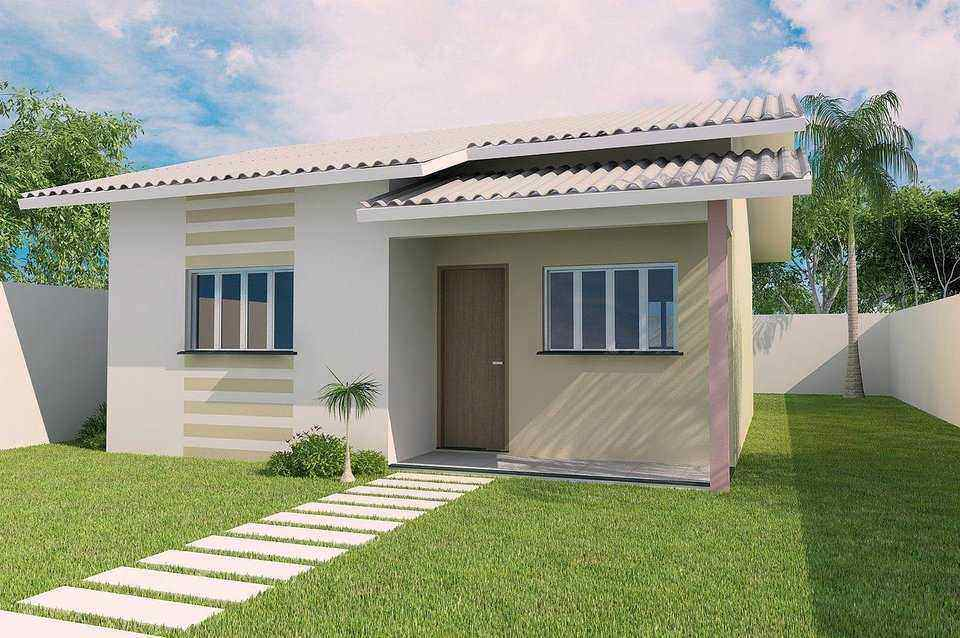

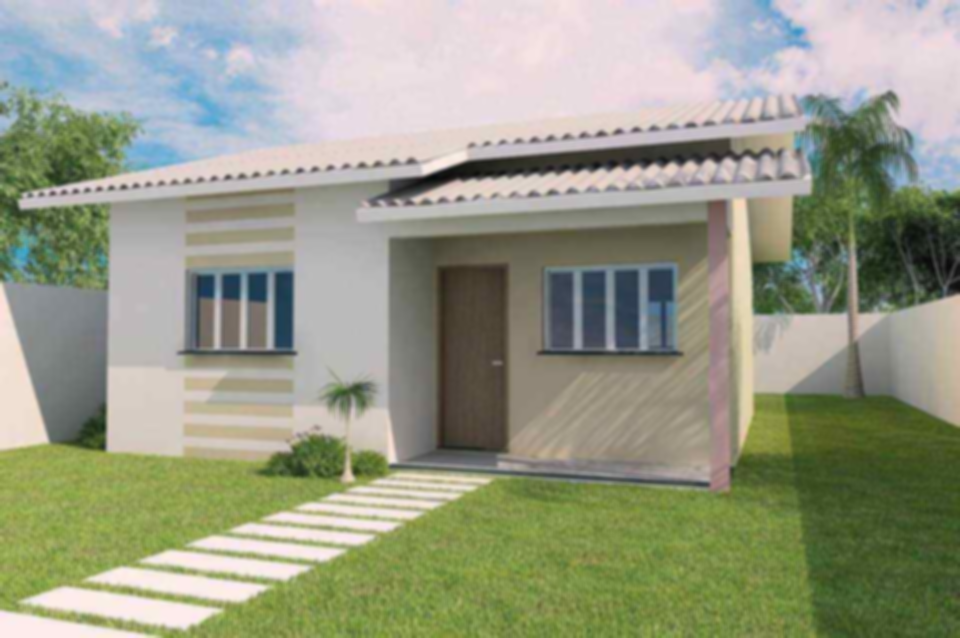

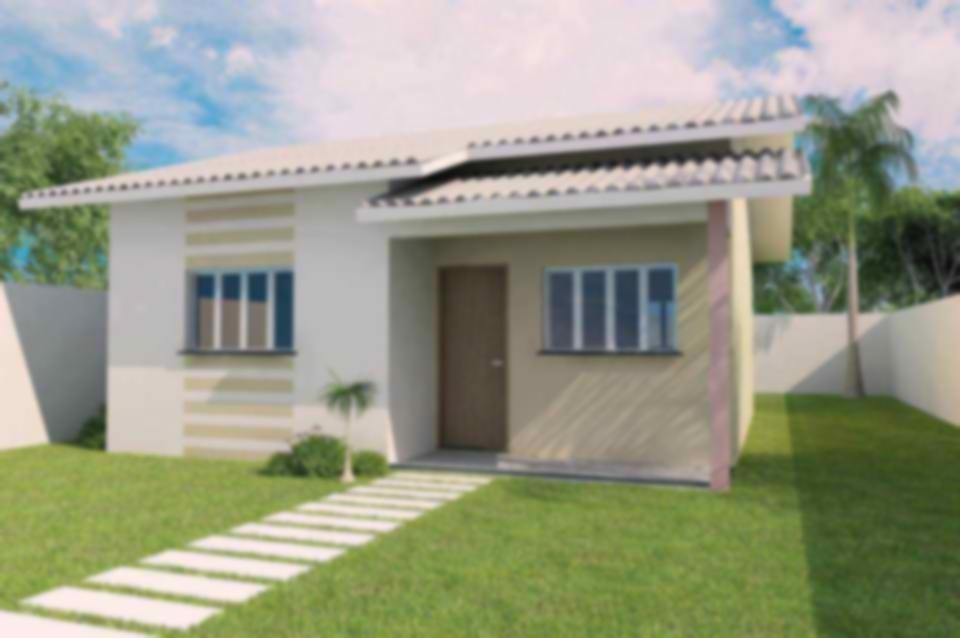

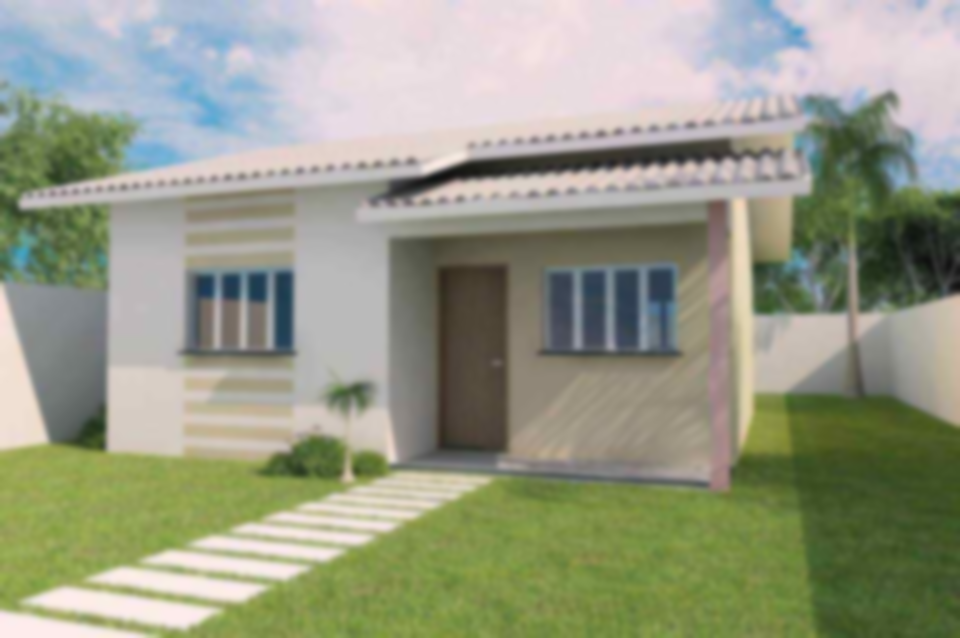

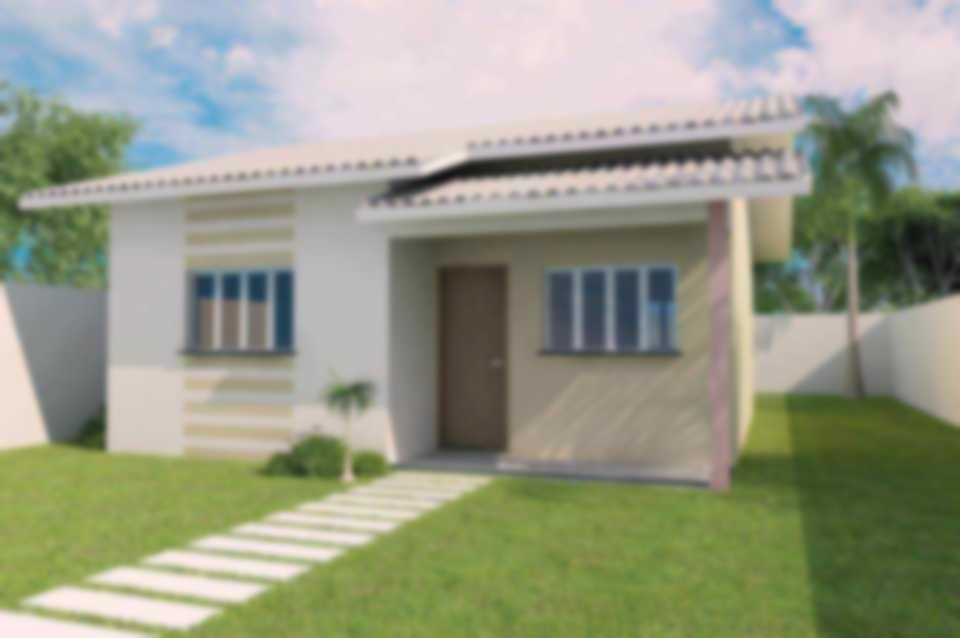

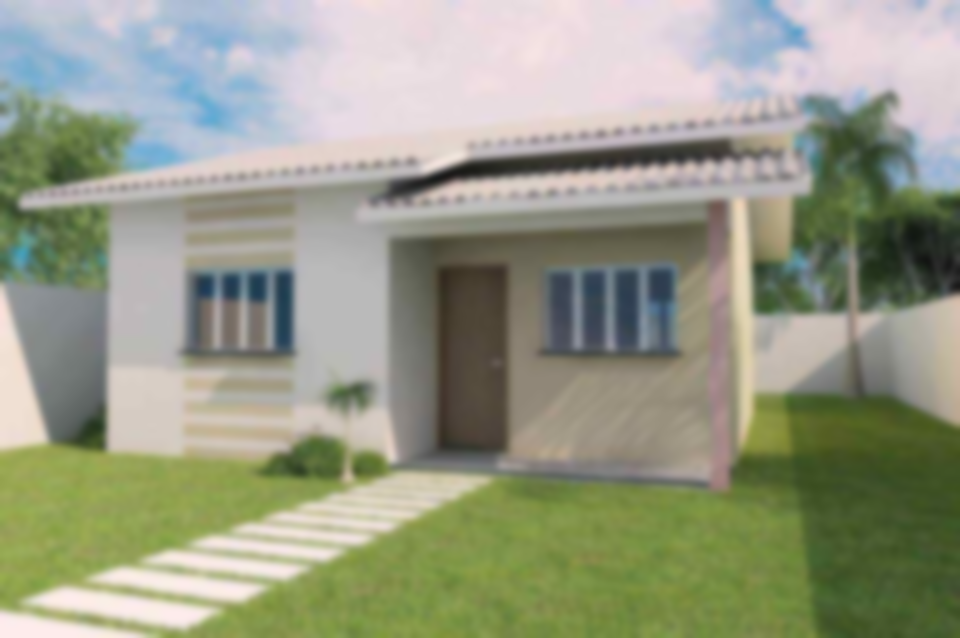

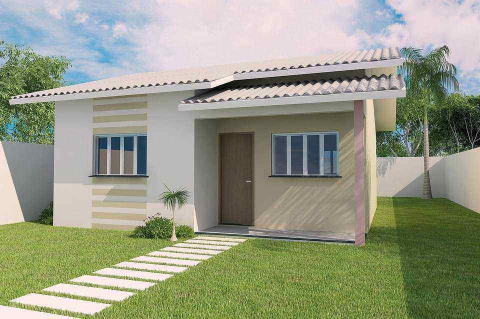

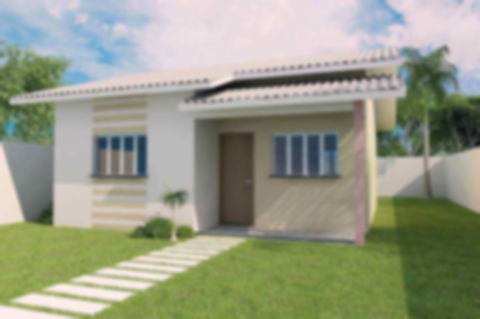

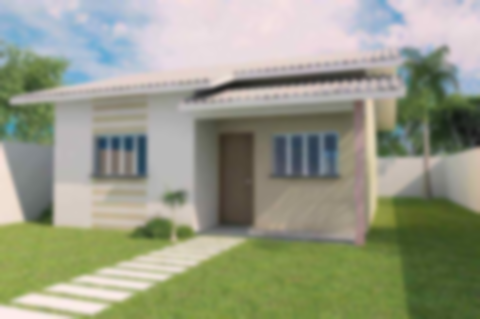

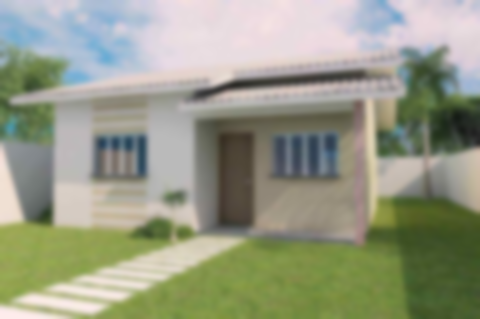

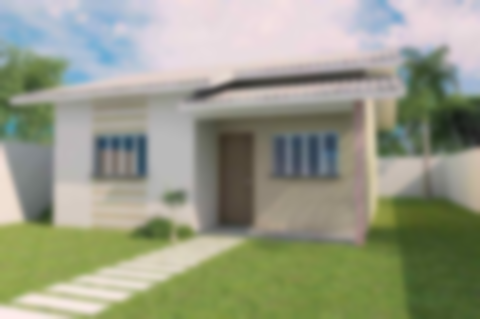

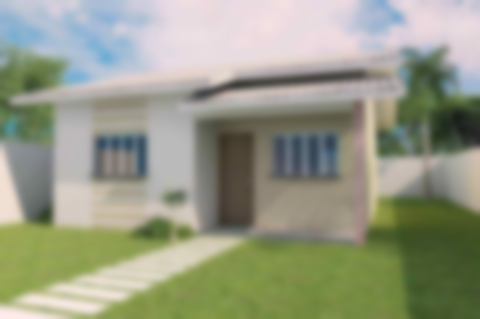

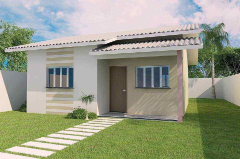

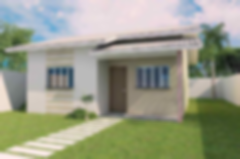

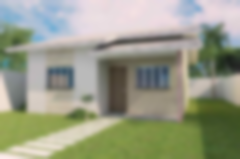

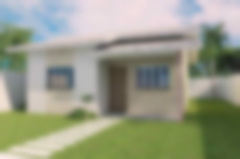

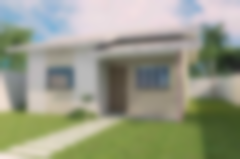

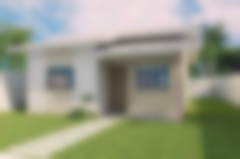

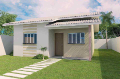

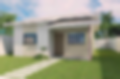

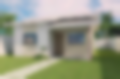

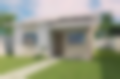

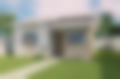

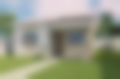

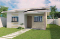

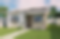

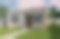

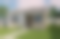

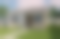

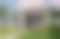

In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# carrega a imagem
image = cv2.imread("casa.jpg")

#Define os parâmetros: número de oitavas, número de escalas, tamanho do kernel e valor de sigma
num_oit = 5 
num_scales = 6 
k_size = 7 
sigma = 1.8 

pyramid = []
for oct in range(num_oit):
    oct_layer = [image]
    for scale in range(1, num_scales):
        blurred = cv2.GaussianBlur(oct_layer[scale - 1], (k_size, k_size), sigma) 
        oct_layer.append(blurred) #aplica o filtro gaussiano
    image = cv2.resize(image, (int(image.shape[1] / 2), int(image.shape[0] / 2))) #reduz as dimensões x e y na metade
    pyramid.append(oct_layer)

for oct_layer in pyramid:
    for scale_image in oct_layer:
        cv2_imshow(scale_image)
        cv2.waitKey(0)

    cv2.destroyAllWindows()


# 4 - Baseado no calculo do tensor de estrutura, descreva o procedimento para detecção de cantos de Harris e explique qual é a função da "Resposta de Harris" no processo

O procedimento para detecção de cantos de Harris se baseia em calcular um fator chamado de "corner score", comumente identificado pela letra R. Esse fator é obtido a partir das derivadas parciais do gradiente da imagem, além de um parâmetro k que diz respeito à sensibilidade da detecção de cantos e é definido empiricamente. Ao realizar a derivada parcial da imagem em relação a x e y, o resultado será uma matriz 2x2 para todos os pontos da imagem, a partir dessa matriz de derivadas são tirados os parâmetros  λ₁ e λ₂, que são os autovalores da matriz de derivadas. 
A "Resposta de Harris" (ou o valor de R) é importante à medida que pontos com valor alto de "R" indicam cantos, enquanto valores de "R" baixos indicam bordas ou lugares planos.